In [1]:
from maze import MazeGenerator
from path_generator import PathGenerator
from genetic_algorithm import GeneticAlgorithm
from maze_drawer import matrix_to_image
from gen_functions import fitness, mutation, crossover
import matplotlib.pyplot as plt
import numpy as np

In [2]:
EPOCHS = 1000
POPULATION = 50
MUTATION_RATE = 0.1
DIM = 21

In [3]:
maze_gen = MazeGenerator(DIM, DIM)
maze_dic = maze_gen.get_matrix_dic("mazes/my_dict.pkl")

# Cargar la data del laberinto desde el archivo
maze_matrix = maze_dic["matrix"]
entry_position = maze_dic["entry"]
exit_position = maze_dic["exit"]
checkpoints = maze_dic["checkpoints"]

maze_dic.keys()

dict_keys(['matrix', 'entry', 'exit', 'checkpoints', 'solutions'])

In [4]:
maze_dic["exit"]

(49, 49)

In [5]:
image = matrix_to_image(maze_matrix, entry_position, exit_position, checkpoints=checkpoints)
image.save("out/maze2.png")
image.show()

In [6]:
# Generar una población de caminos inicial
path_gen = PathGenerator(maze_matrix, entry_position)
path_gen.generate_paths(POPULATION)
paths = path_gen.get_paths()

# Aplicar el algoritmo genético para encontrar la solución
genetic = GeneticAlgorithm(paths, maze_dic, MUTATION_RATE, EPOCHS, POPULATION, fitness, crossover, mutation)
generations, fitness_history, solution_found, final_epoch = genetic.run()

if solution_found:
    print(f"SOLUTION FOUND!! AT EPOCH {final_epoch}")
    print(maze_dic["solutions"])

SOLUTION FOUND!! AT EPOCH 22
{(3, 7): 6423, (5, 11): 12556, (11, 11): 25018, (1, 25): 3518, (27, 31): 2460, (9, 35): 2390, (37, 27): 2556, (45, 7): 1446, (49, 35): 4275, (41, 45): 5749, (49, 49): 17881, (37, 3): 1276, (31, 45): 2724, (29, 7): 1154, (25, 17): 906, (49, 13): 1649, (3, 3): 838, (47, 3): 1069, (21, 5): 992, (17, 1): 678, (25, 47): 2257, (13, 7): 488, (23, 33): 472, (45, 37): 459, (41, 25): 266, (31, 37): 210, (33, 39): 231, (19, 9): 9}


/var/folders/hx/y8xsfw254qj_h_vj_1f6p8kw0000gn/T/ipykernel_17137/3954418197.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


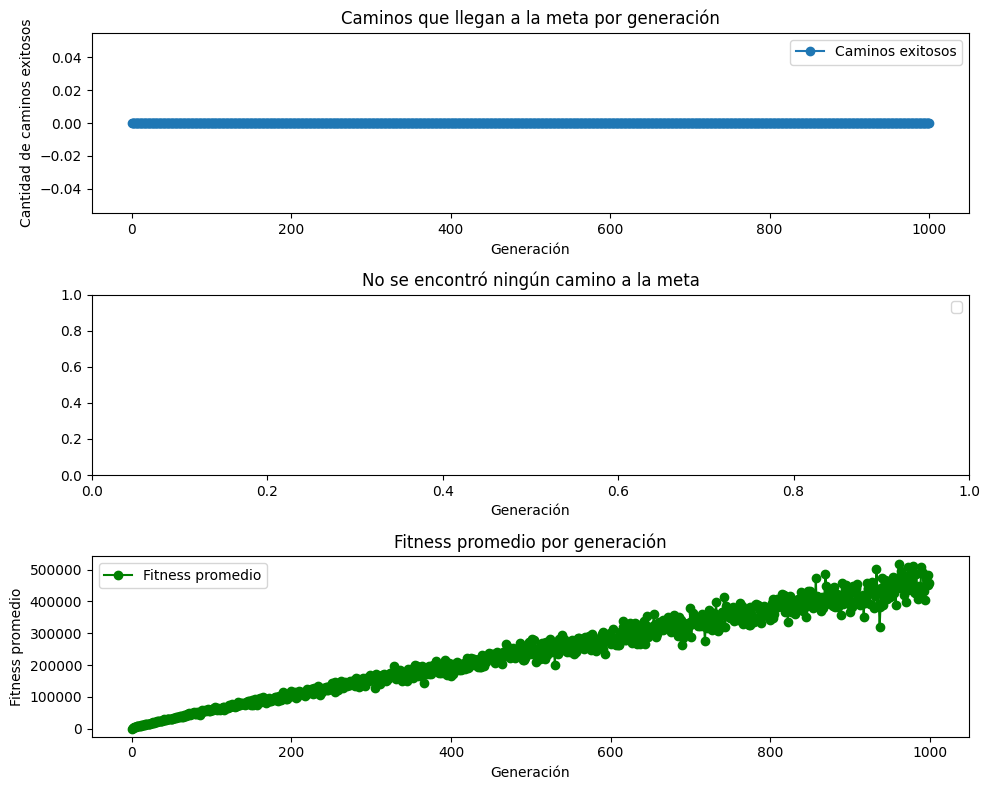

In [7]:
# Variables de laberinto y meta
maze_size = (DIM, DIM)
goal_position = (maze_size[0] - 1, maze_size[1] - 1)

# 1. Caminos que llegan a la meta por generación
successful_paths = [
    sum(1 for path in generation if path[-1] == goal_position) 
    for generation in generations
]

# 2. Primera generación con al menos un camino solucionador
first_solution_generation = next((i for i, generation in enumerate(generations) 
                                  if any(path[-1] == goal_position for path in generation)), None)

# 3. Fitness promedio por generación
avg_fitness_per_generation = [np.mean(fitness) for fitness in fitness_history]

# Gráficos
plt.figure(figsize=(10, 8))

# Gráfico de caminos exitosos por generación
plt.subplot(3, 1, 1)
plt.plot(successful_paths, marker='o', label="Caminos exitosos")
plt.title("Caminos que llegan a la meta por generación")
plt.xlabel("Generación")
plt.ylabel("Cantidad de caminos exitosos")
plt.legend()

# Gráfico de primera generación con solución
plt.subplot(3, 1, 2)
if first_solution_generation is not None:
    plt.axvline(x=first_solution_generation, color="red", linestyle="--", label=f"Primera generación con solución ({first_solution_generation})")
    plt.title(f"Primera generación con al menos un camino a la meta: {first_solution_generation}")
else:
    plt.title("No se encontró ningún camino a la meta")
plt.xlabel("Generación")
plt.legend()

# Gráfico de fitness promedio por generación
plt.subplot(3, 1, 3)
plt.plot(avg_fitness_per_generation, marker='o', color="green", label="Fitness promedio")
plt.title("Fitness promedio por generación")
plt.xlabel("Generación")
plt.ylabel("Fitness promedio")
plt.legend()

plt.tight_layout()
plt.show()
